In [26]:
import pm4py 
import pandas as pd

In [27]:
bpmn_graph = pm4py.read_bpmn("../../data/BPMN_GROUND_TRUTH/order-to-cash-bpmn.xml")
petri_net, im, fm = pm4py.convert_to_petri_net(bpmn_graph)

In [28]:
df_gt = pd.read_csv("../../data_v3/ptp_ground_truth.csv",dtype={"bp_id": str})
df_times = pd.read_csv("../../data_v3/ptp_il_tagged.csv", usecols=["frame.number","synthetic_sniff_time"],
                       parse_dates=["synthetic_sniff_time"])
df_gt = df_gt.merge(df_times, how="left", left_on="start", right_on="frame.number")

In [29]:
petri_net_t, im_t, fm_t = pm4py.discover_petri_net_inductive(df_gt, case_id_key="bp_id", activity_key="activity_name",timestamp_key="synthetic_sniff_time")

In [30]:
args = {"case_id_key":'case_id', "activity_key":'activity', "timestamp_key":'timestamp'}

log_in = pd.read_csv("../../data_v3/out/ptp_xes_out.csv",parse_dates=["timestamp"], dtype={"case_id": str})
#dataframe = pm4py.format_dataframe(log_in, **args)
#event_log = pm4py.convert_to_event_log(dataframe)

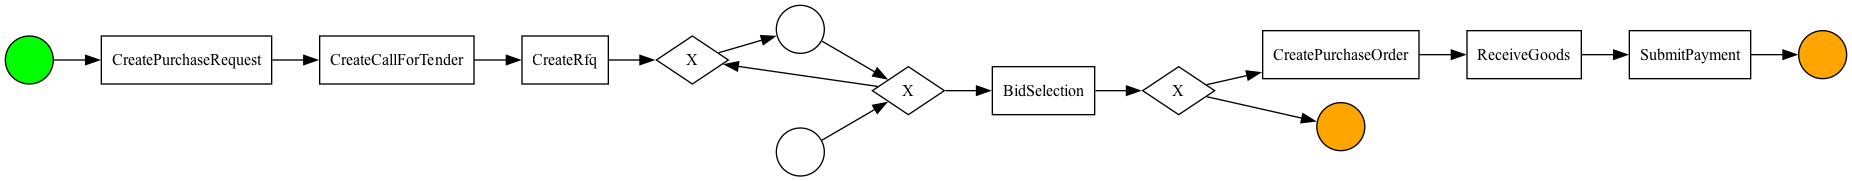

In [31]:
pm4py.view_bpmn(bpmn_graph)

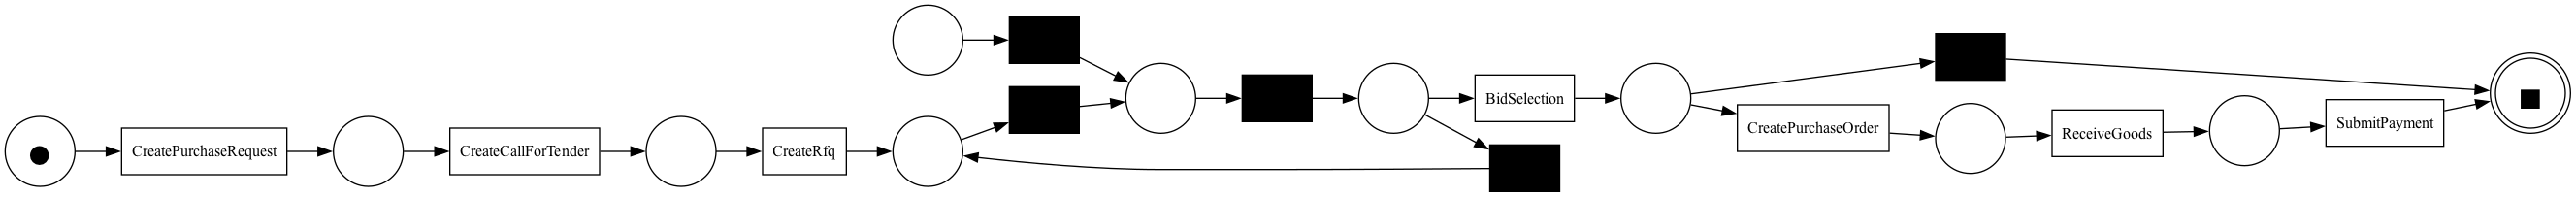

In [32]:
pm4py.view_petri_net(petri_net,im,fm)

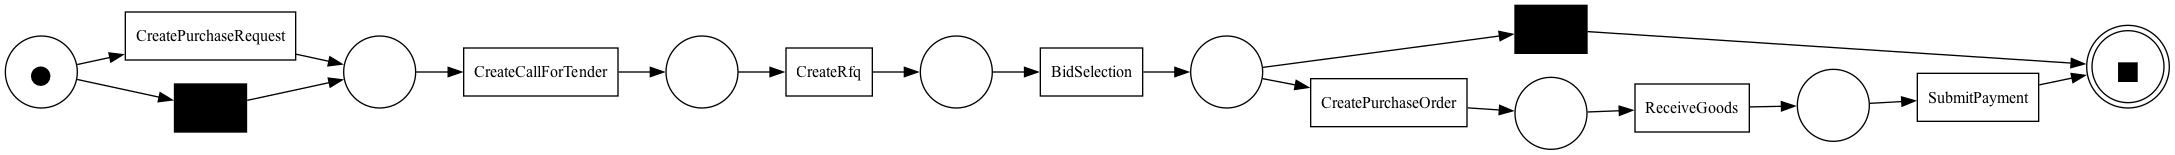

In [33]:
pm4py.view_petri_net(petri_net_t,im_t,fm_t)

## Conformance Checking

### Agignment

In [34]:
pm4py.conformance.fitness_alignments(log_in[log_in["case_id"] != "-1"], petri_net,im,fm, **args)

aligning log, completed variants ::   0%|          | 0/9 [00:00<?, ?it/s]

{'percFitTraces': 20.0,
 'averageFitness': 0.796060606060606,
 'percentage_of_fitting_traces': 20.0,
 'average_trace_fitness': 0.796060606060606,
 'log_fitness': 0.7872131740476368}

In [35]:
log_fitness = pm4py.conformance.fitness_alignments(log_in, petri_net_t,im_t,fm_t, **args)["log_fitness"]

aligning log, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

In [40]:
log_precision = pm4py.conformance.precision_alignments(log_in, petri_net,im,fm, **args)

computing precision with alignments, completed variants ::   0%|          | 0/31 [00:00<?, ?it/s]

In [41]:
log_fitness

0.7083316840655736

In [42]:
log_precision

0.9886363636363636

In [43]:
(log_fitness + log_precision )/2

0.8484840238509685

In [25]:
pm4py.conformance_diagnostics_alignments(log_in[log_in["case_id"] != "-1"], petri_net_t,im_t,fm_t, **args)

aligning log, completed variants ::   0%|          | 0/9 [00:00<?, ?it/s]

[{'alignment': [('CreatePurchaseRequest', 'CreatePurchaseRequest'),
   ('CreateCallForTender', 'CreateCallForTender'),
   ('CreateRfq', 'CreateRfq'),
   ('BidSelection', 'BidSelection'),
   ('SubmitPayment', '>>'),
   ('>>', None)],
  'cost': 10001,
  'visited_states': 6,
  'queued_states': 18,
  'traversed_arcs': 18,
  'lp_solved': 1,
  'fitness': 0.875,
  'bwc': 80002},
 {'alignment': [('CreatePurchaseRequest', 'CreatePurchaseRequest'),
   ('CreateCallForTender', 'CreateCallForTender'),
   ('>>', 'CreateRfq'),
   ('SubmitPayment', '>>'),
   ('BidSelection', 'BidSelection'),
   ('CreatePurchaseOrder', 'CreatePurchaseOrder'),
   ('>>', 'ReceiveGoods'),
   ('SubmitPayment', 'SubmitPayment')],
  'cost': 30000,
  'visited_states': 8,
  'queued_states': 23,
  'traversed_arcs': 23,
  'lp_solved': 6,
  'fitness': 0.6666666666666667,
  'bwc': 90002},
 {'alignment': [('CreatePurchaseRequest', 'CreatePurchaseRequest'),
   ('CreateCallForTender', 'CreateCallForTender'),
   ('CreateRfq', 'CreateR